In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

## KNN - The K-Nearest Neighbors (KNN) algorithm is a popular machine learning technique used for classification and regression tasks. It relies on the idea that similar data points tend to have similar labels or values.
## Loading dataset

In [5]:
zoo = pd.read_csv(r"C:\Users\SUMAN\Desktop\ASSIGNMENT- EXCELR\Zoo.csv")
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [6]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [7]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [8]:
zoo['animal name'].value_counts()

animal name
frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: count, Length: 100, dtype: int64

In [9]:
#check for duplicate values
dups = zoo['animal name'].value_counts()
dups[dups>1]

animal name
frog    2
Name: count, dtype: int64

In [13]:
frog = zoo[zoo['animal name']=='frog']
frog

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [14]:
#we need to find which one is venomous frog 
#change the venomous frog name to frog2 for easy understanding
zoo['animal name'][(zoo['venomous']==1)&(zoo['animal name']=='frog')] = 'frog2'

In [15]:
zoo.head(30)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [16]:
#find the unique value of hair
color_list = [("red" if i == 1 else "blue" if i == 0 else "yellow" ) for i in zoo.hair]
unique_color = list(set(color_list))
unique_color

['red', 'blue']

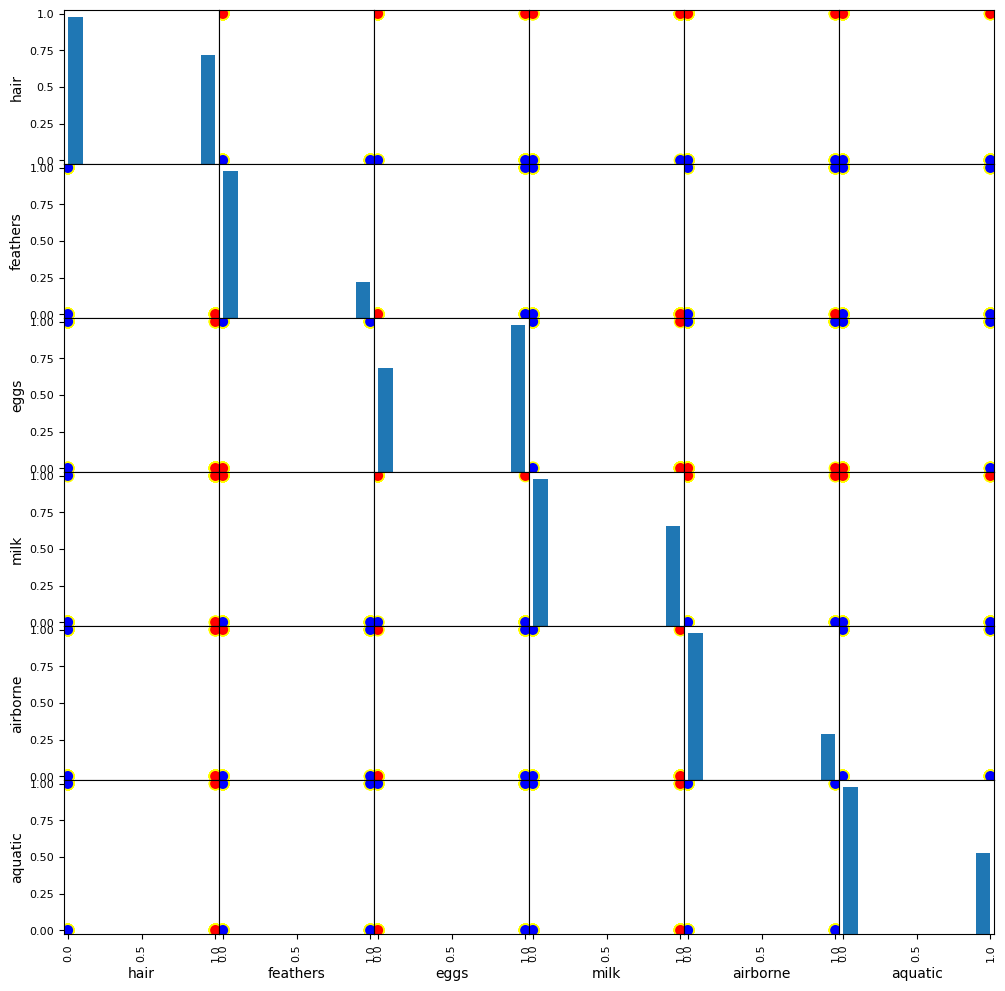

In [19]:
#plotting a scatter plot
pd.plotting.scatter_matrix(zoo.iloc[:,:7],c=color_list,figsize=(12,12),diagonal='hist',alpha=1,s=300,
                          marker='.',edgecolor='yellow')
plt.show()

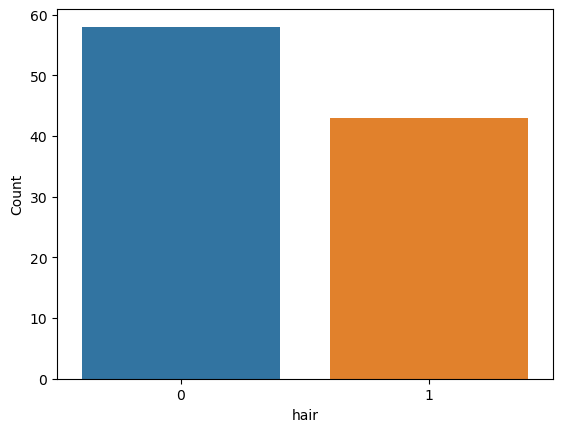

In [22]:
sns.countplot(x="hair",data=zoo)
plt.xlabel("hair")
plt.ylabel("Count")
plt.show()

In [23]:
zoo.loc[:,'hair'].value_counts()

hair
0    58
1    43
Name: count, dtype: int64

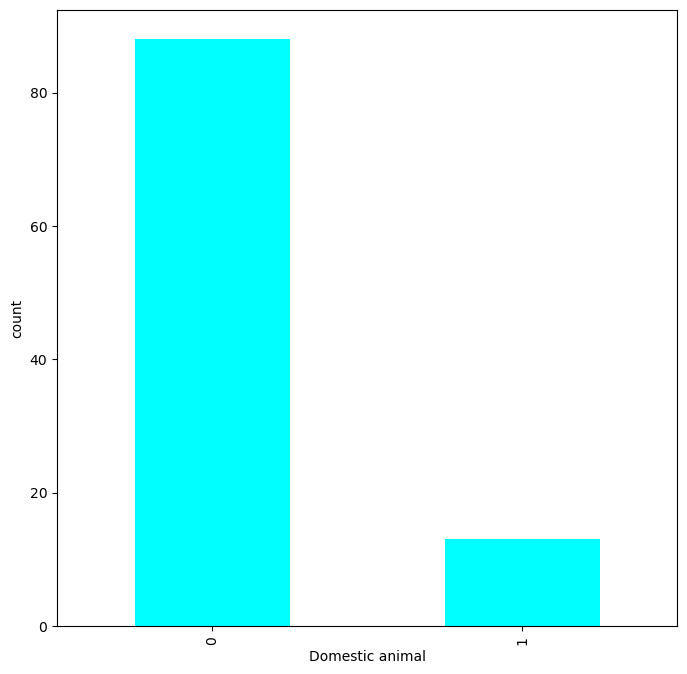

In [27]:
#plot how many animals are domestic or not
plt.figure(figsize=(8,8))
zoo['domestic'].value_counts().plot(kind='bar',color='cyan')
plt.xlabel("Domestic animal")
plt.ylabel("count")
plt.show()

In [28]:
pd.crosstab(zoo['type'],zoo['domestic'])

domestic,0,1
type,,
1,33,8
2,17,3
3,5,0
4,12,1
5,4,0
6,7,1
7,10,0


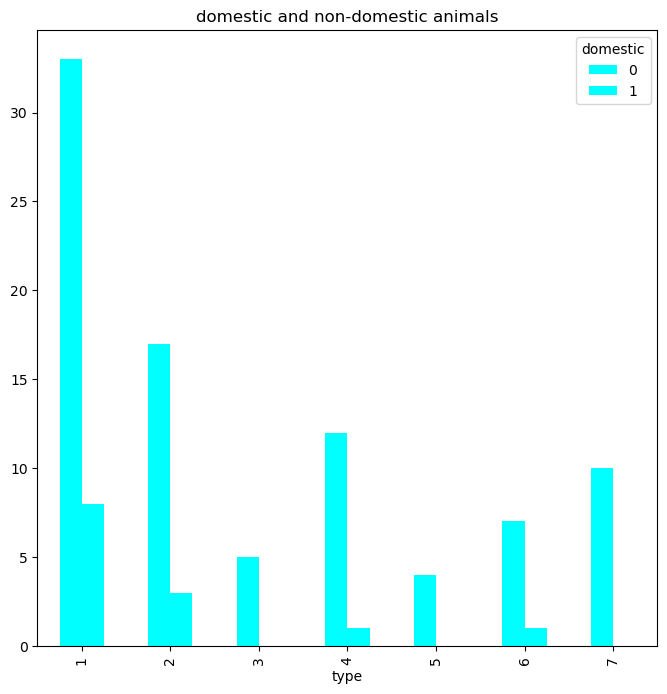

In [30]:
# Lets see species wise domestic and non-domestic animals
pd.crosstab(zoo['type'],zoo['domestic']).plot(kind='bar',color='cyan', figsize=(8,8))
plt.title("domestic and non-domestic animals")
plt.show()

In [31]:
#animals that provide milk
zoo['milk'].value_counts()

milk
0    60
1    41
Name: count, dtype: int64

In [32]:
pd.crosstab(zoo['type'], zoo['milk'])

milk,0,1
type,,
1,0,41
2,20,0
3,5,0
4,13,0
5,4,0
6,8,0
7,10,0


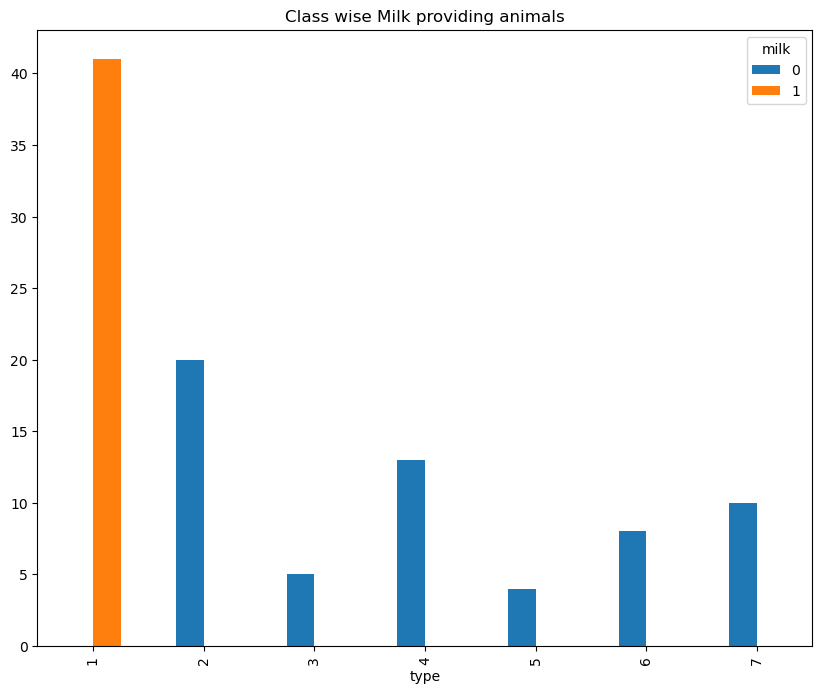

In [33]:
pd.crosstab(zoo['type'], zoo['milk']).plot(kind="bar", figsize=(10, 8))
plt.title("Class wise Milk providing animals")
plt.show()

In [34]:
# Lets see how many animals live under water. i.e aquatic
# lets find out all the aquatic animals.
zoo.aquatic.value_counts()

aquatic
0    65
1    36
Name: count, dtype: int64

In [35]:
zoo[zoo['aquatic']==1].type.value_counts()

type
4    13
7     6
1     6
2     6
5     4
3     1
Name: count, dtype: int64

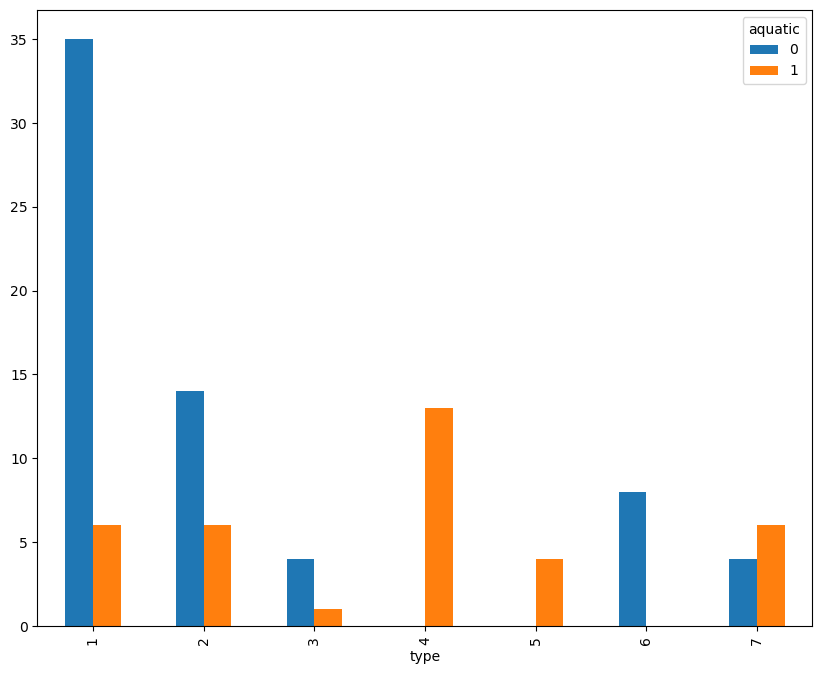

In [36]:
pd.crosstab(zoo['type'], zoo['aquatic']).plot(kind="bar", figsize=(10, 8));

In [37]:
#finding unique values of class_type
type_list = [i for i in zoo.type ]
uni_type = list(set(type_list))
uni_type

[1, 2, 3, 4, 5, 6, 7]

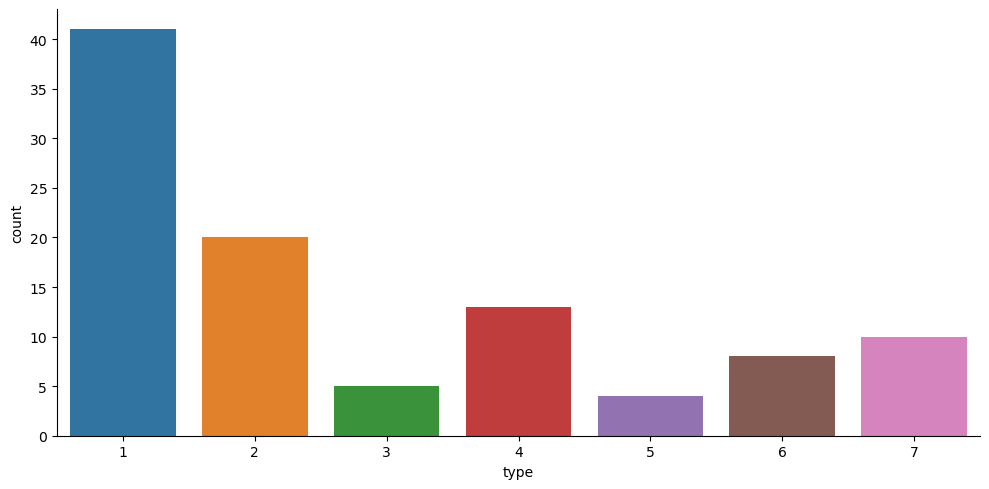

In [49]:
sns.catplot(x='type', data=zoo, kind="count",height=5,aspect = 2)

In [50]:
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [51]:
# split train test data into 70/30.
from sklearn.model_selection import train_test_split
X = zoo.iloc[:,1:16]
Y = zoo.iloc[:,16]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=1)

In [52]:
X_train

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic
73,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0
19,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0
27,1,0,0,1,1,0,0,1,1,1,0,0,2,1,0
48,1,0,0,1,0,1,1,1,1,1,0,0,4,1,0
58,0,1,1,0,0,1,1,0,1,1,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1,0,0,1,0,1,1,1,1,1,0,1,2,1,0
9,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1
72,0,0,0,0,0,0,1,0,0,1,1,0,8,1,0
12,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0


In [53]:
X_test

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic
94,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0
78,0,1,1,0,1,1,1,0,1,1,0,0,2,1,0
17,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0
100,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0
36,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0
85,0,0,1,0,0,1,1,0,0,0,0,0,5,0,0
55,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0
83,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0
82,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0
52,0,0,1,0,0,1,1,1,1,1,0,0,4,1,0


In [55]:
y_train

73    0
19    1
27    0
48    1
58    1
     ..
75    1
9     0
72    0
12    0
37    0
Name: catsize, Length: 70, dtype: int64

In [56]:
y_test

94     0
78     0
17     1
100    0
36     0
85     0
55     1
83     0
82     0
52     0
95     1
44     1
31     1
93     0
65     1
35     0
66     1
70     1
81     0
80     0
33     0
32     1
40     0
39     0
38     0
46     0
42     0
10     1
2      0
54     0
67     1
Name: catsize, dtype: int64

In [57]:
num_fold = 10
kfold = KFold(n_splits=10)

In [58]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [59]:
#predicting on test data
pred = model.predict(X_test)
pd.Series(pred).value_counts()

0    16
1    15
Name: count, dtype: int64

In [61]:
pd.crosstab(y_test,pred)

col_0,0,1
catsize,,
0,14,6
1,2,9


In [62]:
#accuracy 
np.mean(pred==y_test)

0.7419354838709677

In [63]:
model.score(X_train,y_train)

0.8285714285714286

In [66]:
print("Accuracy", accuracy_score(y_test,pred)*100)

Accuracy 74.19354838709677


In [67]:
results = cross_val_score(model, X, Y, cv=kfold)

In [68]:
results.mean()

0.7627272727272728

In [70]:
results.std()

0.12704199865197183

## Grid Search for Algorithm Tuning

In [80]:
n_neighbors = np.array((1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [81]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1, 40])})

In [82]:
print(grid.best_score_)
print(grid.best_params_)

0.6914285714285715
{'n_neighbors': 1}


In [83]:
k_value = np.arange(1,30)
train_acc = []
test_acc = []
for i,k in enumerate(k_value):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_acc.append(knn.score(X_train,y_train))
    test_acc.append(knn.score(X_test,y_test))

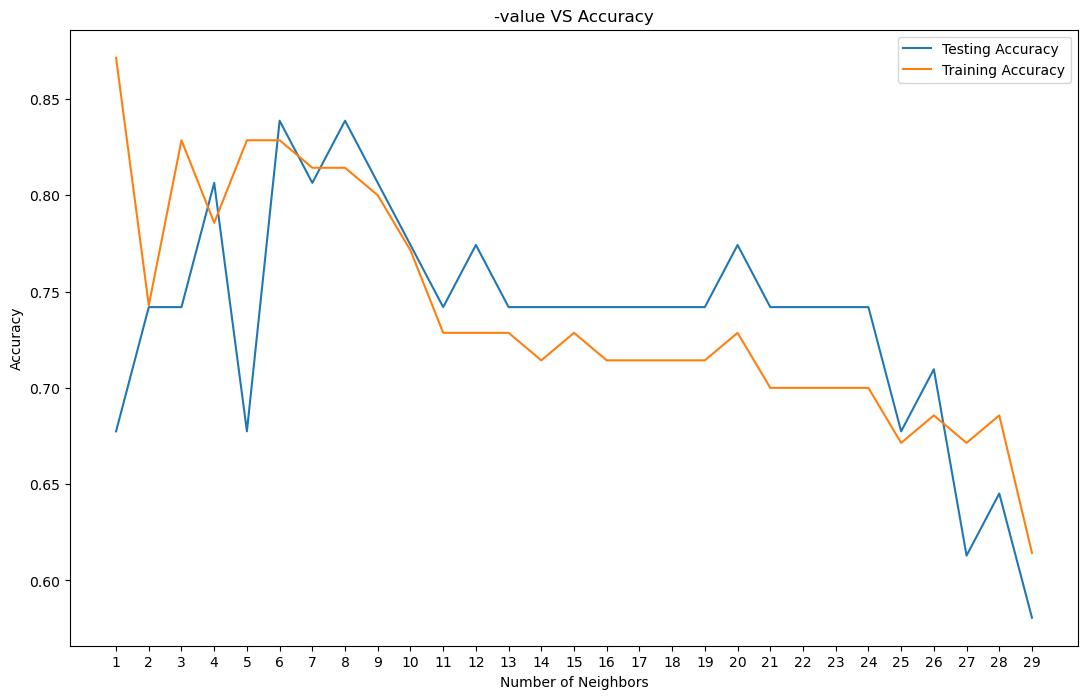

In [87]:
plt.figure(figsize=[13,8])
plt.plot(k_value, test_acc, label = 'Testing Accuracy')
plt.plot(k_value, train_acc, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_value)
plt.savefig('graph.png')
plt.show()